In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import warnings

warnings.filterwarnings('ignore')

# Логистическая регрессия

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rc("font", size=14)
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings

warnings.simplefilter(action='ignore')

In [8]:
train_df = pd.read_csv("Datasets/train.csv")

test_df = pd.read_csv("Datasets/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [11]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print('Percent of missing "Age" records is %.2f%%' % ((train_df['Age'].isnull().sum() / train_df.shape[0]) * 100))

Percent of missing "Age" records is 19.87%


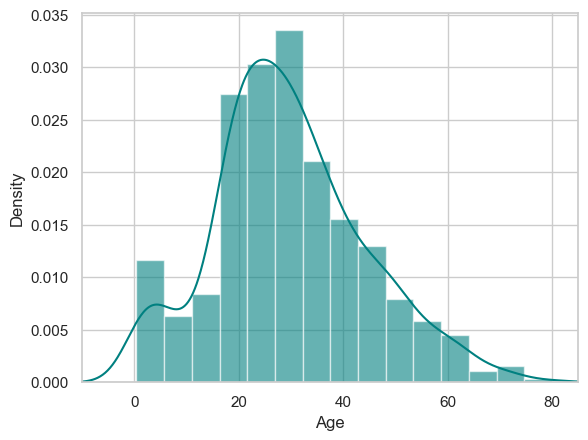

In [15]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [16]:
print('The mean of "Age" is %.2f' % (train_df["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' % (train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [17]:
print('Percent of missing "Cabin" records is %.2f%%' % ((train_df['Cabin'].isnull().sum() / train_df.shape[0]) * 100))

Percent of missing "Cabin" records is 77.10%


In [18]:
print('Percent of missing "Embarked" records is %.2f%%' % (
        (train_df['Embarked'].isnull().sum() / train_df.shape[0]) * 100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


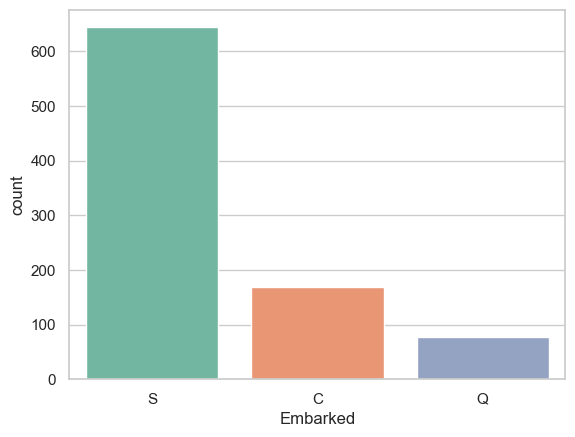

In [19]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [20]:
print('The most common boarding port of embarkation is %s.' % train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [21]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [22]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


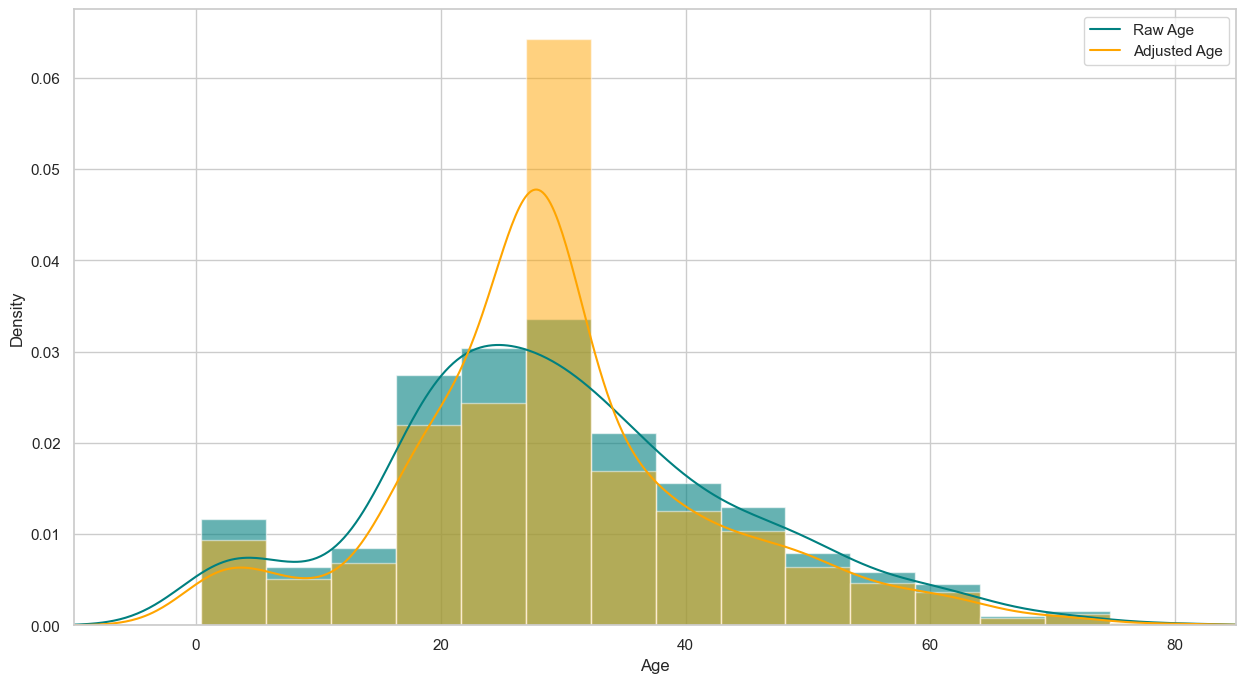

In [24]:
plt.figure(figsize=(15, 8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [25]:
## Create categorical variable for traveling alone
train_data['TravelAlone'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [26]:
#create categorical variables and drop some variables
training = pd.get_dummies(train_data, columns=["Pclass", "Embarked", "Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


++++++++++++++++++++++++

In [27]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone'] = np.where((test_data["SibSp"] + test_data["Parch"]) > 0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass", "Embarked", "Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


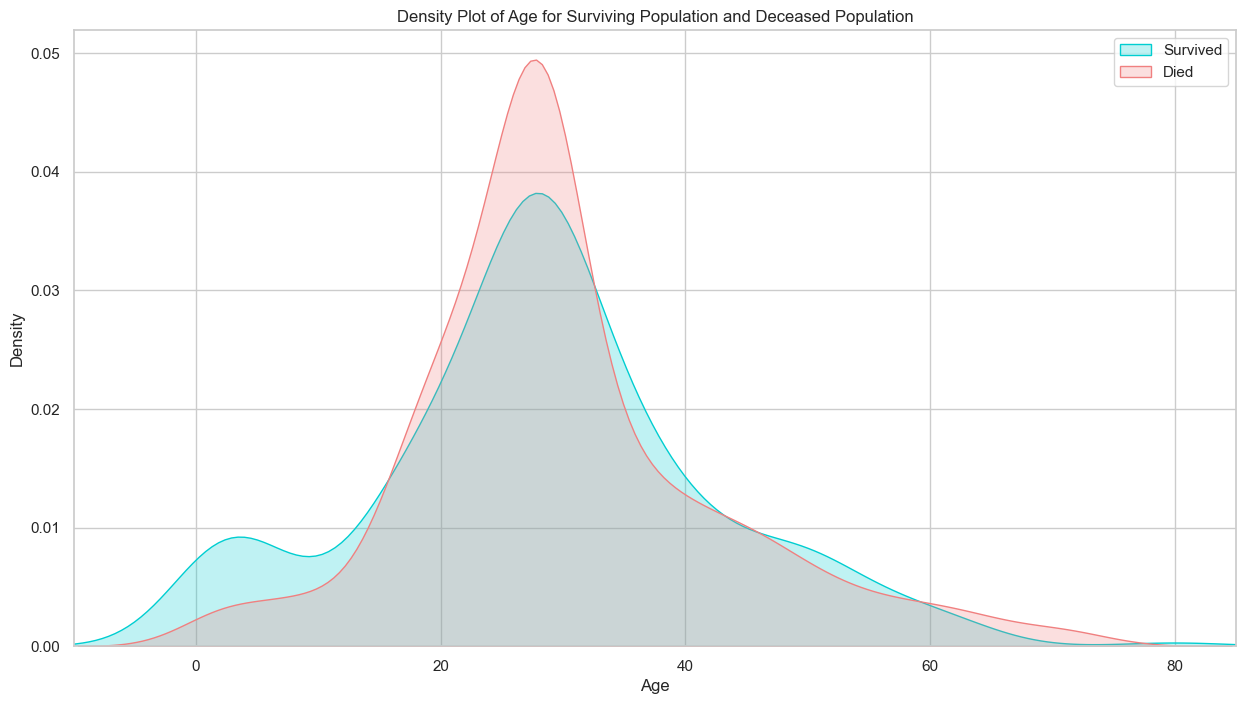

In [29]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

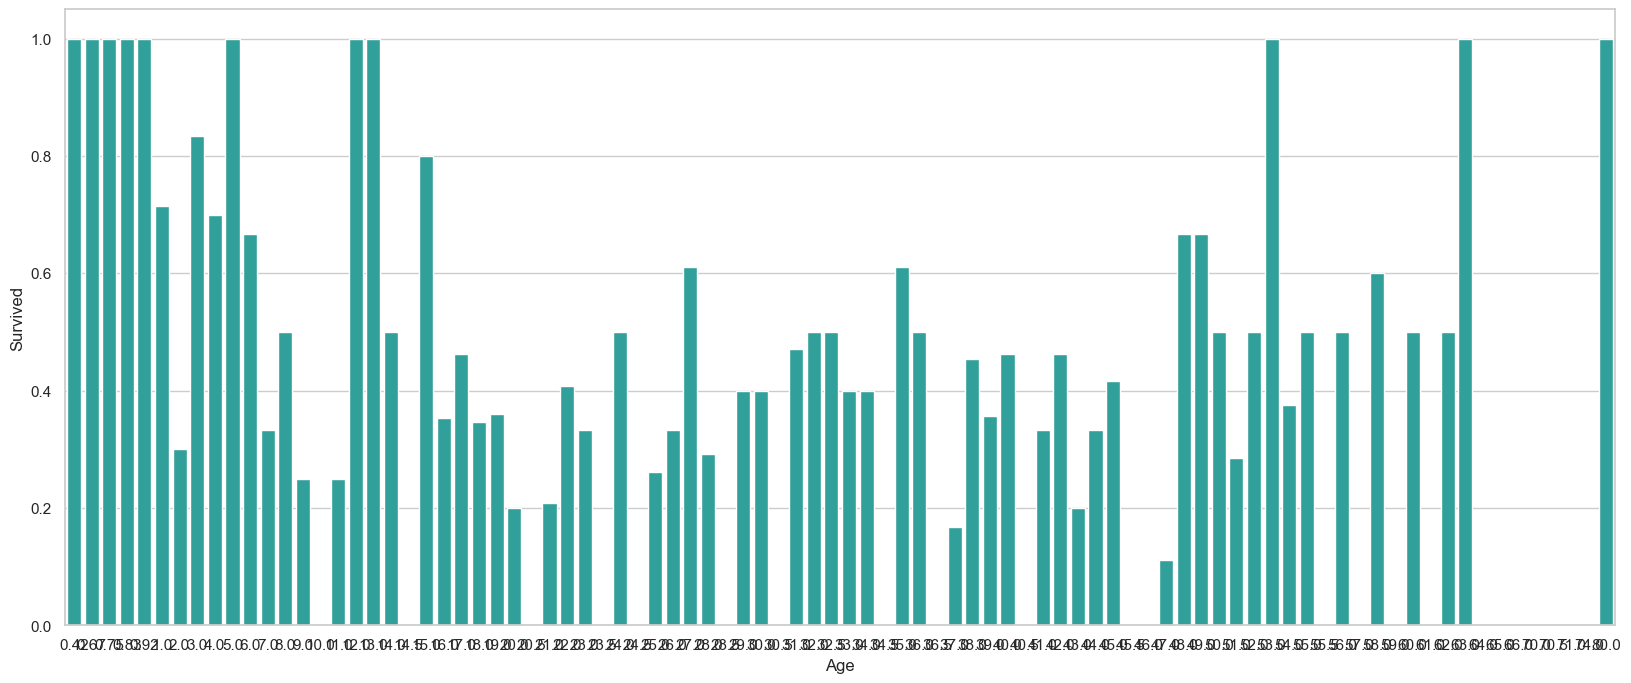

In [30]:
plt.figure(figsize=(20, 8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [31]:
final_train['IsMinor'] = np.where(final_train['Age'] <= 16, 1, 0)

final_test['IsMinor'] = np.where(final_test['Age'] <= 16, 1, 0)

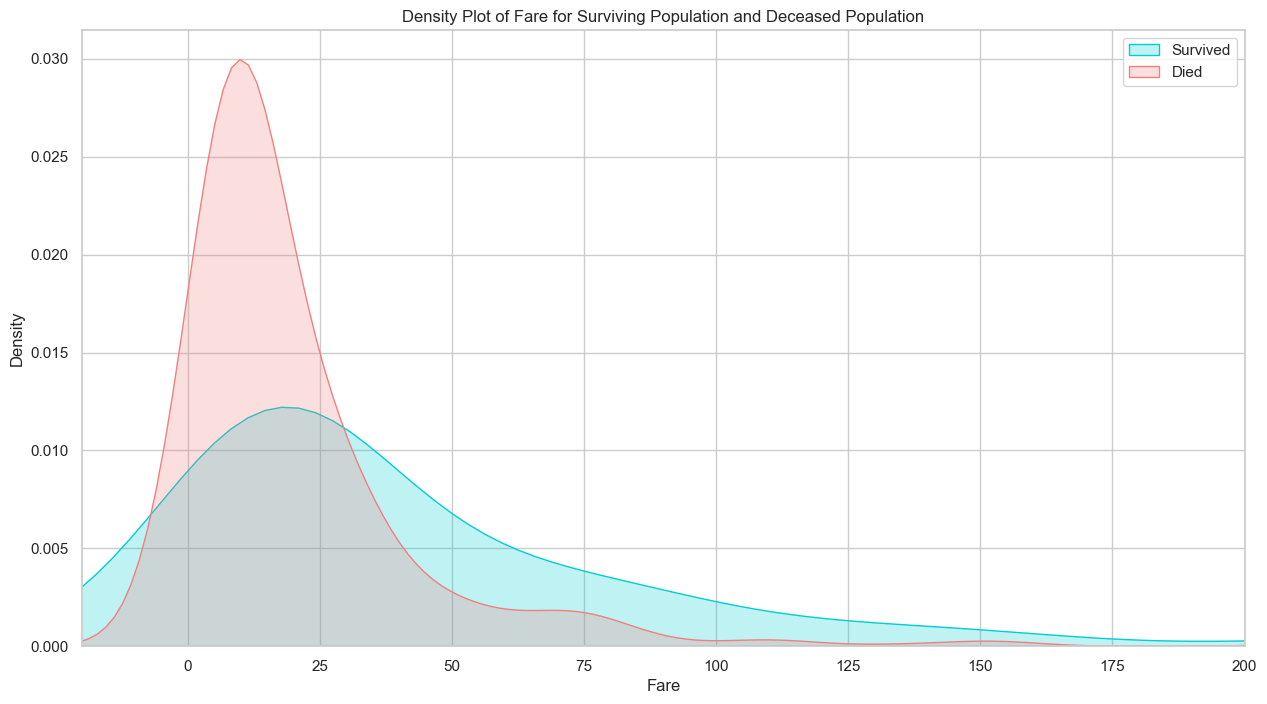

In [32]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

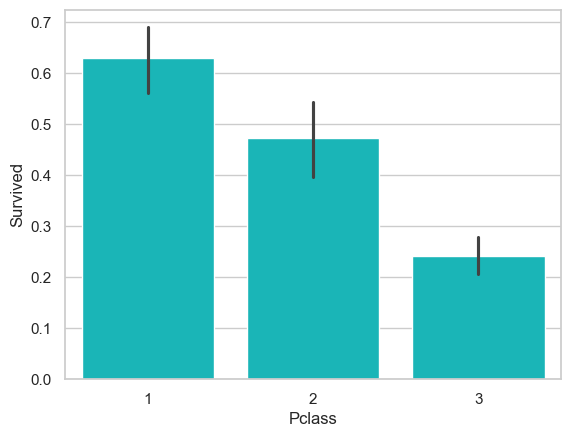

In [38]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")
plt.show()

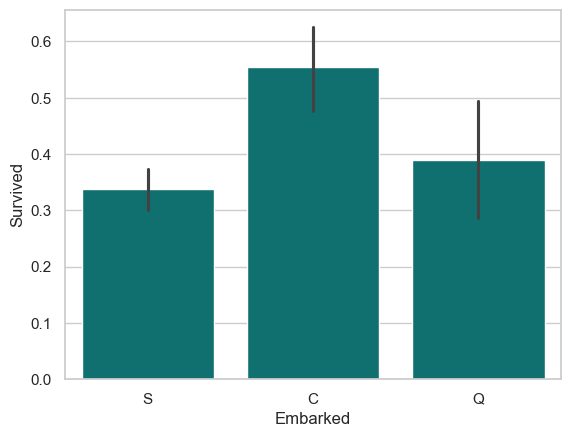

In [39]:
sns.barplot(x='Embarked', y='Survived', data=train_df, color="teal")
plt.show()

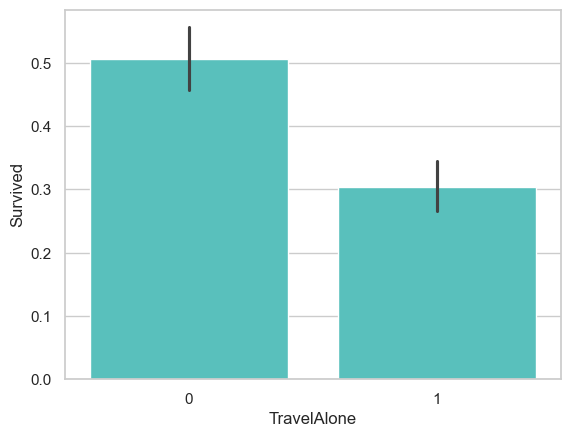

In [40]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color="mediumturquoise")
plt.show()

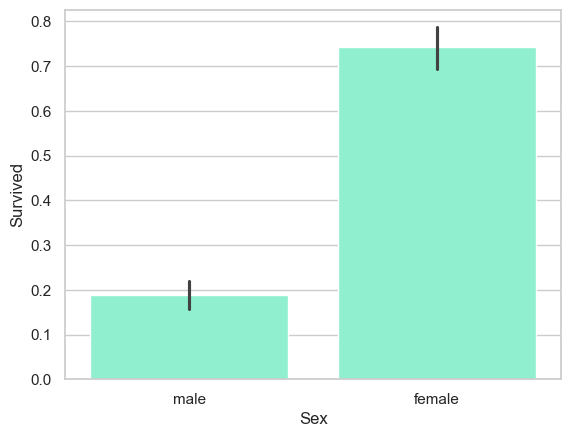

In [41]:
sns.barplot(x='Sex', y='Survived', data=train_df, color="aquamarine")
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Embarked_C", "Embarked_S", "Sex_male", "IsMinor"]
X = final_train[cols]
y = final_train['Survived']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


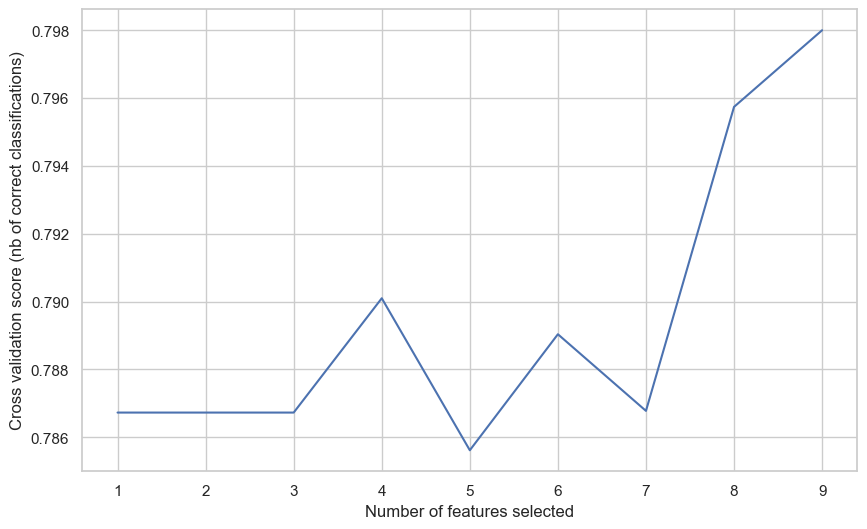

In [60]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

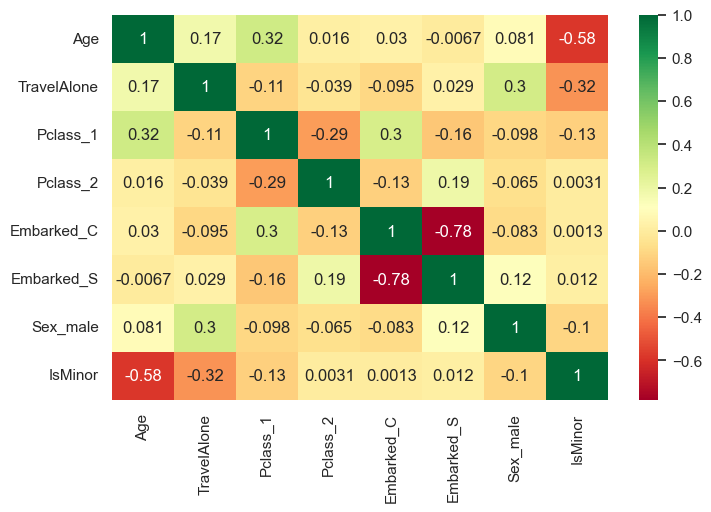

In [61]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


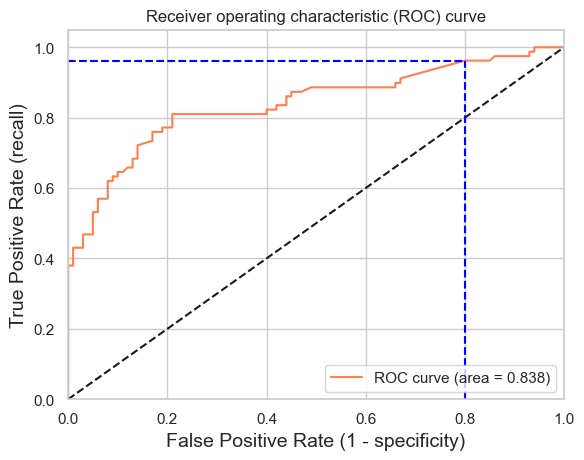

Using a threshold of 0.070 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__ + " accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))

In [63]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__ + " average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__ + " average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__ + " average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, \
    precision_recall_curve

# Загрузка данных
iris_df = sns.load_dataset("iris")

# Разделение данных на признаки и метки классов
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

# Кодирование категориальных меток в числа
y = y.map({"setosa": 0, "versicolor": 1, "virginica": 2})

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель логистической регрессии
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Модель k-ближайших соседей (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Модель метода опорных векторов (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Оценка моделей
models = [logistic_model, knn_model, svm_model]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "SVM"]
results = []

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average="macro")

    results.append([model_names[i], accuracy, f1, cm, roc_auc])

# Визуализация PR и ROC кривых для каждой модели
plt.figure(figsize=(12, 5))
for i, model in enumerate(models):
    y_score = model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=2)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=2)

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, lw=2, label=model_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR Curve")

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, lw=2, label=model_names[i])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Вывод результатов
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Confusion Matrix", "ROC AUC"])
print(results_df)

In [ ]:
from sklearn.linear_model import LogisticRegression
#обучим логистическую регрессию

In [ ]:
#выведем метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок
#может пригодиться from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# для построения кривых можно воспользоваться from sklearn.preprocessing import label_binarize
# для построения кривых необходимо использовать метки тергета 0 и 1 в качестве первого аргумента
# и вероятности попадания в класс, можно получить, используя predict_proba

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка подготовленных данных
data = pd.read_csv('Datasets/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', delimiter="|")
# Вывод имен всех столбцов в датасете
print(data.columns)

# Предполагая, что имена столбцов в вашем датасете имеют следующий порядок
# 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service',
# 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp',
# 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
# 'tunnel_parents', 'label', 'detailed-label'

X = data.drop(['label', 'detailed-label'], axis=1)  # Признаки, исключая метки
y = data['label']  # Метки классов

# Проверка, что данные разделены корректно
print("Признаки (X):")
print(X.head())  # Вывод первых нескольких строк признаков
print("\nМетки классов (y):")
print(y.head())  # Вывод первых нескольких меток классов

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)  # Может потребоваться увеличить max_iter в зависимости от данных
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Точность модели: {accuracy}')
print(f'Матрица ошибок:\n{conf_matrix}')
print(f'Отчет о классификации:\n{class_report}')

classification_report

Support: количество наблюдений для каждого класса

Подходы к усреднению метрик

micro = accuracy (сумма верных срабатываний для всех классов, деленная на все объекты)

Macro avg: среднее арифметическое показателя между классами

weighted avg: средневзвешенное значение рассчитывается путем произведения оценки показателя каждого класса на его количество наблюдений, последующее суммирование результата и деление результата на сумму наблюдений

Зачем?

* Удобно, когда классов очень много
* micro - когда классы сбалансированы
* macro - каждому классу даем одинаковый вес, вне зависимости от дисбаланса классов, хорошо использовать, если нам важен меньший класс, например, мошеннические транзакции, которых мало, а хороших транзакций много, при плохой модели мы получим низкую macro метрику
* weighted - учитываем размер каждого класса, даем класса вес, согласно их количеству. Если меньший класс нам не важен, то мы можем им принебречь при подсчете метрики. Если macro сильно среагирует на ошибки на малом классе, то weighted нет.
